<a href="https://colab.research.google.com/github/terra2n/2025_computer_vision/blob/main/jobsheet02/jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [2]:
!pip install -r https://raw.githubusercontent.com/terra2n/2025_computer_vision/main/jobsheet02/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 40.3 MB/s eta 0:00:00


## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


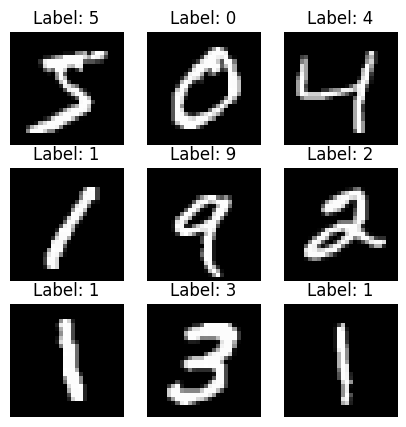

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure (figsize=(5, 5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

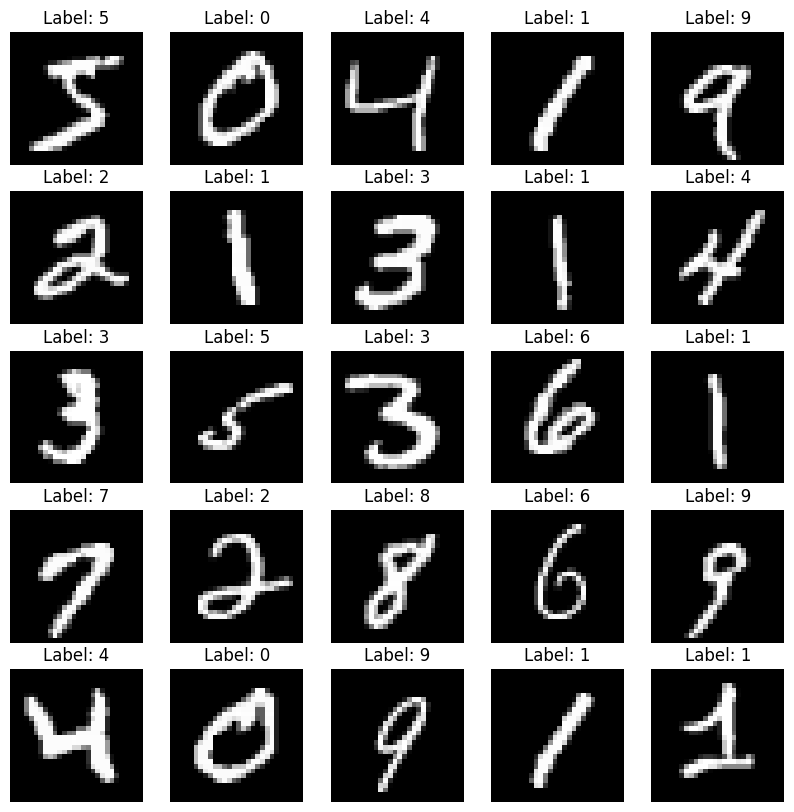

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure (figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi: ", accuracy_score(y_test, y_pred))

Akurasi:  0.9101


In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi: ", accuracy_score(y_test, y_pred))

Akurasi:  0.9513


## Praktikum D3 - Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8937 - loss: 0.3540 - val_accuracy: 0.9792 - val_loss: 0.0766
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9781 - loss: 0.0709 - val_accuracy: 0.9857 - val_loss: 0.0541
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9866 - loss: 0.0447 - val_accuracy: 0.9858 - val_loss: 0.0485
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9865 - val_loss: 0.0508
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9837 - val_loss: 0.0572


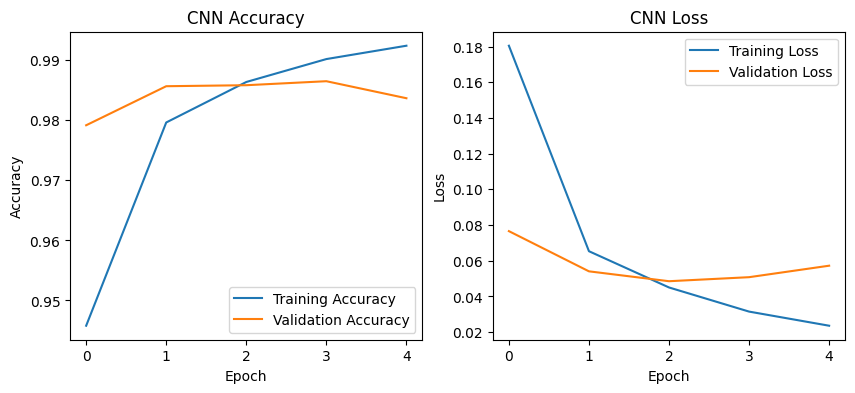

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.8873 - loss: 0.3672 - val_accuracy: 0.9868 - val_loss: 0.0468
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9907 - val_loss: 0.0349
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - accuracy: 0.9930 - loss: 0.0238 - val_accuracy: 0.9893 - val_loss: 0.0362
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 0.9903 - val_loss: 0.0446


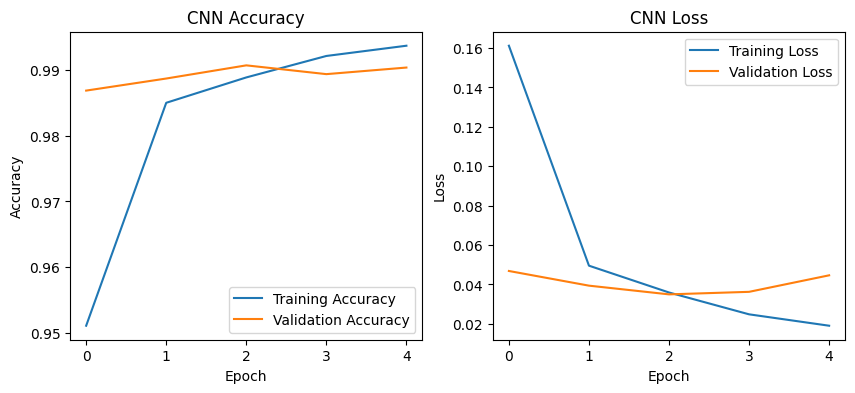

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # Added Conv2D layer
    layers.MaxPooling2D((2, 2)), # Added MaxPooling2D layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.3464 - loss: 1.7840 - val_accuracy: 0.5692 - val_loss: 1.2330
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5693 - loss: 1.2271 - val_accuracy: 0.6116 - val_loss: 1.1106
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6301 - loss: 1.0609 - val_accuracy: 0.6436 - val_loss: 1.0223
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.6601 - loss: 0.9754 - val_accuracy: 0.6624 - val_loss: 0.9795
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.6855 - loss: 0.9091 - val_accuracy: 0.6592 - val_loss: 0.9969
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7057 - loss: 0.8453 - val_accuracy: 0.6876 - val_loss: 0.9247
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7239 - loss: 0.7956 - val_accuracy: 0.6942 - val_loss: 0.9102
Epoch 8/10
1407/1407 ━━

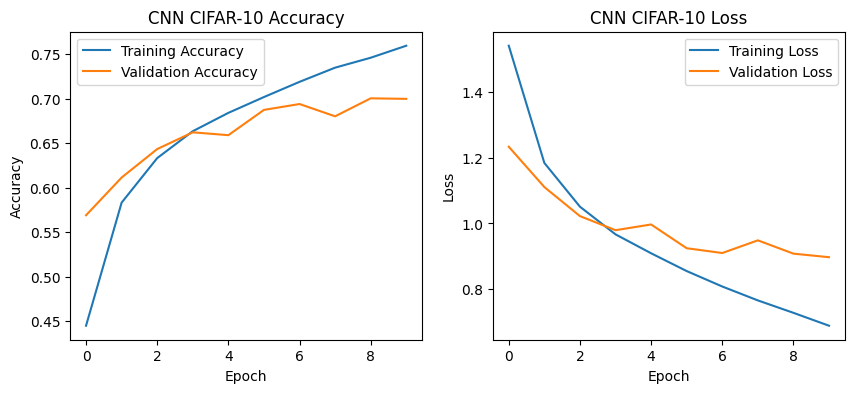

In [10]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.2636 - loss: 1.9740 - val_accuracy: 0.4940 - val_loss: 1.4334
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.4439 - loss: 1.5180 - val_accuracy: 0.5336 - val_loss: 1.2998
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.4900 - loss: 1.4057 - val_accuracy: 0.5896 - val_loss: 1.1709
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.5217 - loss: 1.3222 - val_accuracy: 0.6316 - val_loss: 1.0843
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.5472 - loss: 1.2586 - val_accuracy: 0.6224 - val_loss: 1.0776
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.5670 - loss: 1.2124 - val_accuracy: 0.6362 - val_loss: 1.0360
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5868 - loss: 1.1569 - val_accuracy: 0.6538 - val_loss: 0.9910
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5927 -

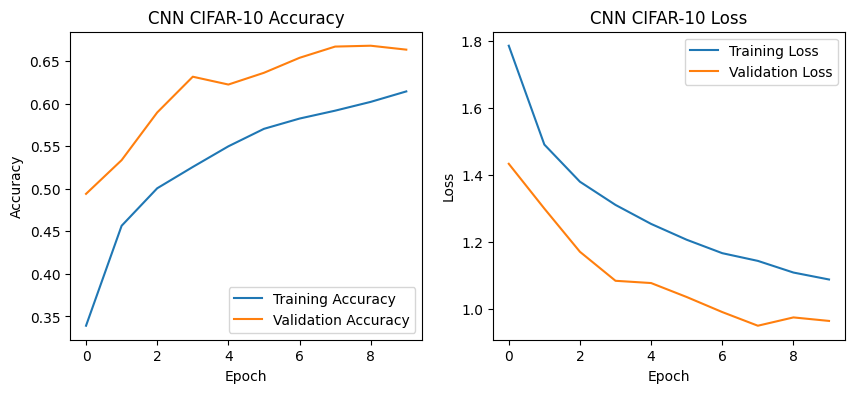

In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Added Dropout layer
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D5 - Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 563s 399ms/step - accuracy: 0.4605 - loss: 1.5476 - val_accuracy: 0.5792 - val_loss: 1.2182
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 535s 380ms/step - accuracy: 0.5831 - loss: 1.2018 - val_accuracy: 0.5900 - val_loss: 1.1678
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 592s 401ms/step - accuracy: 0.6033 - loss: 1.1406 - val_accuracy: 0.5874 - val_loss: 1.1676
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 590s 378ms/step - accuracy: 0.6147 - loss: 1.1036 - val_accuracy: 0.6040 - val_loss: 1.1277
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 561s 399ms/step - accuracy: 0.6298 - loss: 1.0614 - val_accuracy: 0.6090 - val_loss: 1.1060


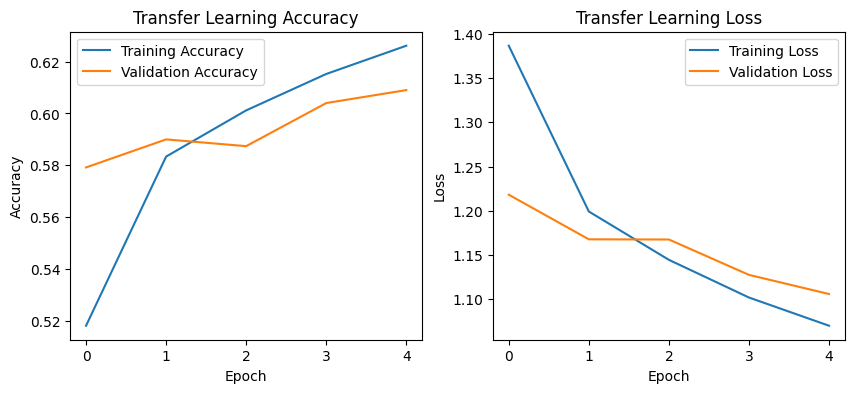

In [12]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2183s 2s/step - accuracy: 0.4783 - loss: 1.4442 - val_accuracy: 0.6910 - val_loss: 0.9014
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2164s 2s/step - accuracy: 0.7122 - loss: 0.8514 - val_accuracy: 0.6832 - val_loss: 0.9153
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2198s 2s/step - accuracy: 0.7489 - loss: 0.7381 - val_accuracy: 0.7240 - val_loss: 0.8199
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2188s 2s/step - accuracy: 0.7777 - loss: 0.6460 - val_accuracy: 0.7418 - val_loss: 0.7675
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2169s 2s/step - accuracy: 0.7916 - loss: 0.5911 - val_accuracy: 0.7484 - val_loss: 0.7707


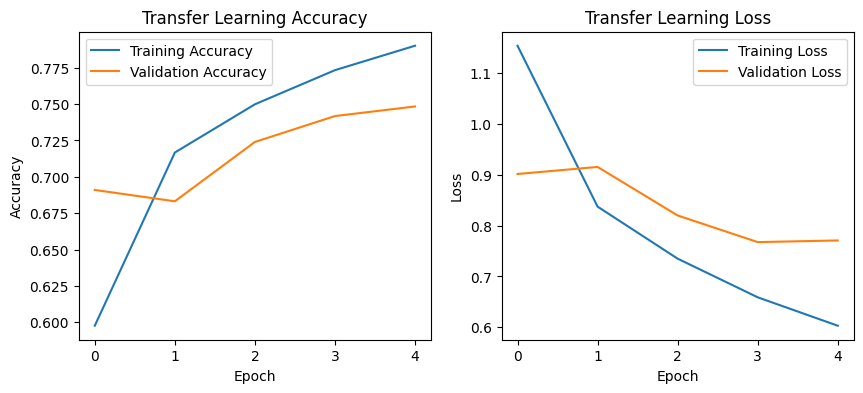

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))
# Freeze all layers in the base model initially
base_model.trainable = False

# Unfreeze the last two convolutional blocks for fine-tuning
for layer in base_model.layers[-4:]: # Unfreeze the last 4 layers which correspond to the last two conv blocks
    layer.trainable = True


model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Recompile the model after unfreezing layers
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Use a lower learning rate for fine-tuning
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 341ms/step
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1000
           1       0.79      0.87      0.83      1000
           2       0.69      0.68      0.68      1000
           3       0.53      0.59      0.56      1000
           4       0.70      0.68      0.69      1000
           5       0.66      0.62      0.64      1000
           6       0.79      0.75      0.77      1000
           7       0.85      0.73      0.79      1000
           8       0.81      0.88      0.84      1000
           9       0.75      0.84      0.79      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



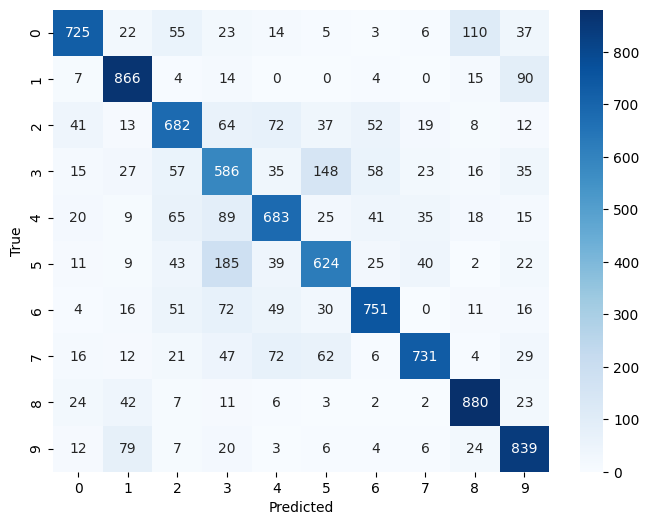

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()